### Installation:

Install LGNpy using

``pip install lgnpy``

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from lgnpy import LinearGaussian

### Make a network using edges

In [2]:
lg = LinearGaussian()
lg.set_edges_from([('A', 'D'), ('B', 'D'), ('D', 'E'), ('C', 'E')])

<img src="https://github.com/ostwalprasad/LGNpy/blob/master/docs/images/network.png" width="200" >

### Create synthetic data for above network and bind it with network

In [3]:
np.random.seed(42)
n=100
data = pd.DataFrame(columns=['A','B','C','D','E'])
data['A'] = np.random.normal(5,2,n)
data['B'] = np.random.normal(10,2,n)
data['D'] = 2*data['A'] + 3*data['B'] + np.random.normal(0,2,n)
data['C'] = np.random.normal(-5,2,n)
data['E'] = 3*data['C'] + 3*data['D'] + np.random.normal(0,2,n)


lg.set_data(data)

### Details of network

In [4]:
lg.network_summary()

,Node,Mean,Std,Parents,Children
0,A,4.7923,1.8163,[],[D]
1,B,10.0446,1.9073,[],[D]
2,C,-4.7863,1.7682,[],[E]
3,D,39.8482,6.8605,"[A, B]",[E]
4,E,105.0737,21.0446,"[D, C]",[]


In [5]:
lg.get_covariance()

,A,B,C,D,E
A,3.299080,-0.472617,-0.546709,5.931998,15.629612
B,-0.472617,3.637938,-0.059400,9.817065,30.047115
C,-0.546709,-0.059400,3.126541,-1.272613,6.367760
D,5.931998,9.817065,-1.272613,47.066698,138.162703
E,15.629612,30.047115,6.367760,138.162703,442.876745


### Set Evidence 

In [6]:
lg.set_evidences({'A':5,'B':10})

### Run Inference

In [7]:
lg.run_inference(debug=True)

Started
Calculating children of A : ['D']
	calculated for D
Calculating children of B : ['D']
	D already calculated
Calculating children of C : ['E']
Evidence wasn't available for node C, so took mean.
	calculated for E


<Logger lgnpy.logging_config (DEBUG)>


({'A': 5,
  'B': 10,
  'C': -4.786319758605391,
  'D': 40.17729734929936,
  'E': 106.06876013138348},
 {'A': None,
  'B': None,
  'C': None,
  'D': 4.530868459203312,
  'E': 4.291922724095514})


### Run Inference  without evidence


In [8]:
lg.clear_evidences()
lg.run_inference()

Started
No evidence was set. Proceeding without evidence
Calculating children of A : ['D']
Evidence wasn't available for node A, so took mean.
	calculated for D
Calculating children of B : ['D']
Evidence wasn't available for node B, so took mean.
	D already calculated
Calculating children of C : ['E']
Evidence wasn't available for node C, so took mean.
	calculated for E


<Logger lgnpy.logging_config (DEBUG)>


({'A': 4.792306965211812,
  'B': 10.04460917409985,
  'C': -4.786319758605391,
  'D': 39.84823395892406,
  'E': 105.07373365993537},
 {'A': None,
  'B': None,
  'C': None,
  'D': 4.530868459203312,
  'E': 4.291922724095514})

### Visualizing Data

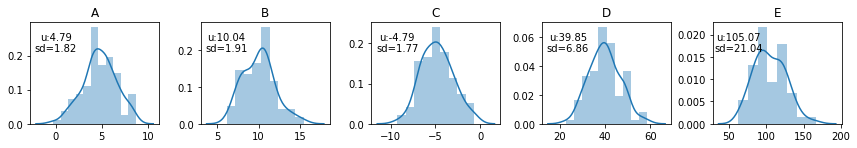

In [10]:
lg.plot_distributions()